##  1. Comprensión del Negocio

**Objetivo general:**
Apoyar la toma de decisiones clínicas mediante el análisis de datos de pacientes con cáncer de pulmón.

**Subobjetivos específicos:**
1. Predecir los meses de supervivencia del paciente (`Survival_Months`)
2. Clasificar el estado del cáncer (`Stage`) a partir de datos clínicos
3. Evaluar el riesgo del paciente (alto/bajo) con base en biomarcadores

**Impacto esperado:**
- Mejorar el pronóstico de pacientes
- Apoyar la personalización del tratamiento
- Identificar factores de riesgo temprano

---

##  2. Comprensión de los Datos

**Acciones:**
- Cargar el dataset y revisar su estructura (`df.info()`)
- Explorar la distribución de la variable objetivo (`Survival_Months`)
- Analizar variables categóricas y numéricas
- Detectar correlaciones, outliers y posibles errores

**Herramientas utilizadas:**
- `pandas`, `matplotlib`, `seaborn`

---

##  3. Preparación de los Datos

**Pasos clave:**
- Codificar variables categóricas con **One-Hot Encoding** (`pd.get_dummies`)
- Escalar variables numéricas con **StandardScaler**
- Eliminar columnas irrelevantes (por ejemplo, `Patient_ID`)
- Crear variable binaria `High_Risk` o `Survival_Class` si se usa clasificación
- Dividir los datos en conjuntos de entrenamiento y prueba (`train_test_split`)

---

##  4. Modelado

### A. Modelo de Regresión
- **Objetivo:** Predecir `Survival_Months`
- **Algoritmos sugeridos:**
  - Regresión Lineal
  - Random Forest Regressor
  - XGBoost Regressor
- **Métricas:** MAE, MSE, R²

### B. Clasificación del Estado del Cáncer
- **Objetivo:** Predecir `Stage`
- **Algoritmos:**
  - Random Forest Classifier
  - SVM (Support Vector Machine)
  - k-NN (K-Nearest Neighbors)
- **Métricas:** Accuracy, Precision, Recall, F1-Score

### C. Análisis de Riesgo (Binario)
- **Objetivo:** Predecir `High_Risk` (por ejemplo, `Survival_Months ≤ 60`)
- **Algoritmos:** los mismos que clasificación
- **Métricas:** F1-Score, AUC

###  Validación cruzada:
Usar `cross_val_score` o `GridSearchCV` para comparar y ajustar hiperparámetros automáticamente.

---

##  5. Evaluación

**Acciones:**
- Comparar resultados de los modelos
- Analizar errores y precisión
- Validar interpretabilidad (por ejemplo, `feature importance`)
- Generar visualizaciones:
  - Matriz de confusión
  - Curva ROC (para clasificación)
  - Gráficos de predicción vs. valores reales (para regresión)

---

##  6. (Omitido) Deployment

En este proyecto académico no se hará despliegue real, pero se puede sugerir:

> “En una aplicación real, este modelo se integraría en un sistema hospitalario para alertar sobre pacientes de alto riesgo.”

---

##  7. Conclusiones y Recomendaciones


- Factores más influyentes en la supervivencia
- Modelos con mejor desempeño
- Limitaciones del dataset (por ejemplo, que es sintético)
- Posibles mejoras: agregar historial longitudinal, exámenes adicionales, más variables clínicas, etc.


## 2 Comprensión de los Datos

En esta fase se busca entender la estructura del dataset, identificar patrones generales, posibles problemas en los datos y preparar el terreno para la limpieza y modelado.

# Estructura general del DataFrame
df.info()
df.head()

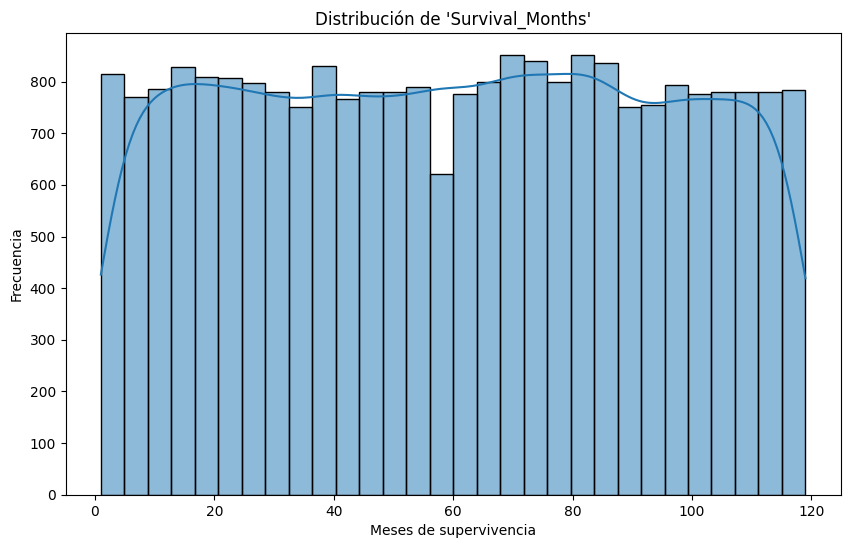

count    23658.000000
mean        59.863809
std         34.246042
min          1.000000
25%         30.000000
50%         60.000000
75%         89.000000
max        119.000000
Name: Survival_Months, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("lung_cancer_data.csv")
plt.figure(figsize=(10,6))
sns.histplot(df['Survival_Months'], bins=30, kde=True)
plt.title("Distribución de 'Survival_Months'")
plt.xlabel("Meses de supervivencia")
plt.ylabel("Frecuencia")
plt.show()

# Estadísticas generales
print(df['Survival_Months'].describe())

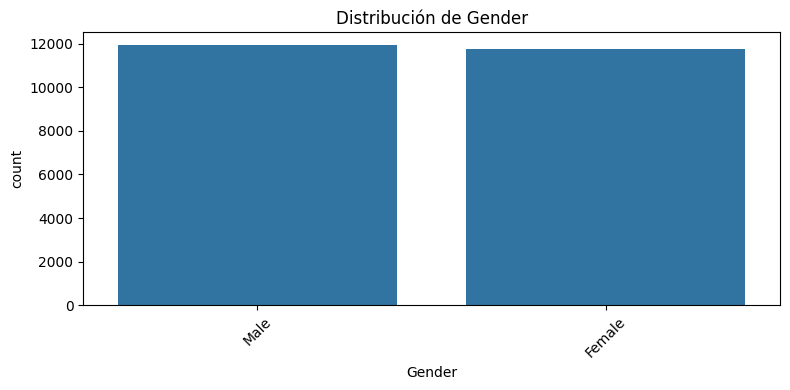

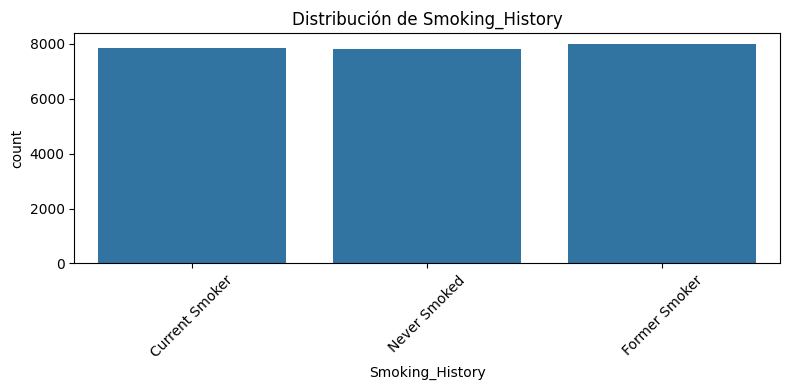

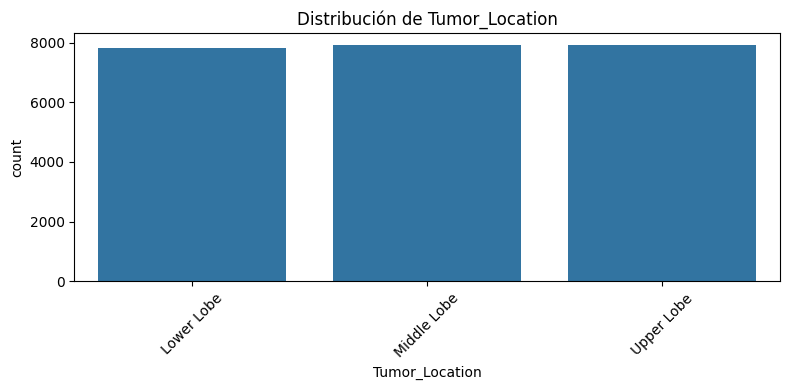

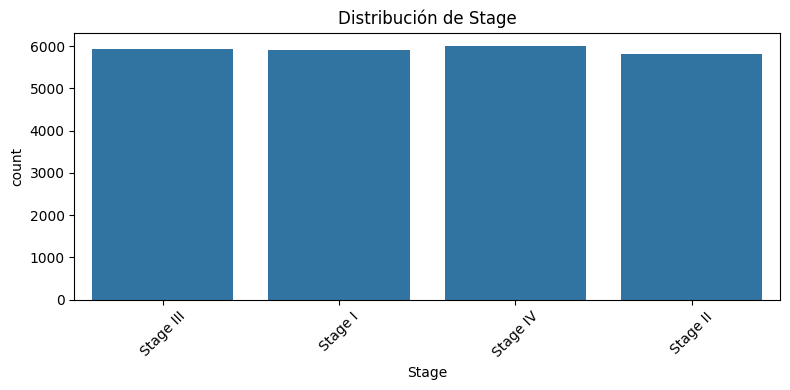

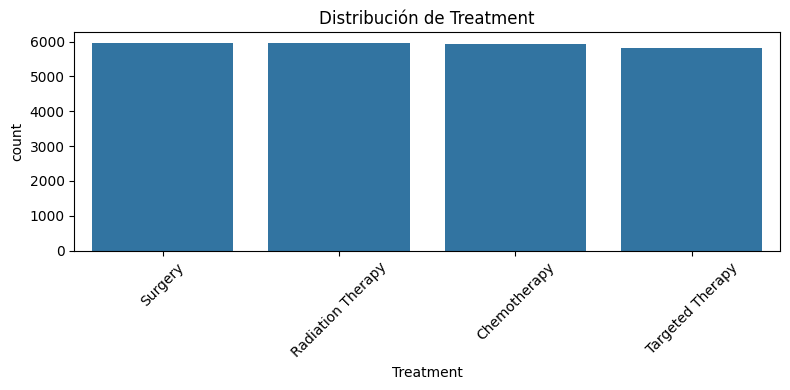

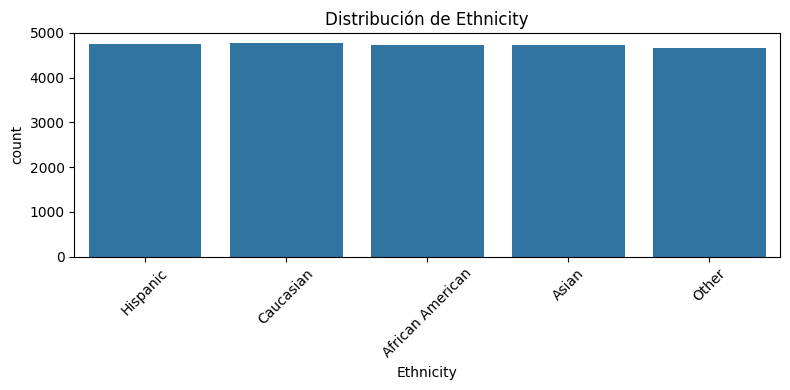

In [7]:
categoricas = ['Gender', 'Smoking_History', 'Tumor_Location', 'Stage', 'Treatment', 'Ethnicity']
for col in categoricas:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


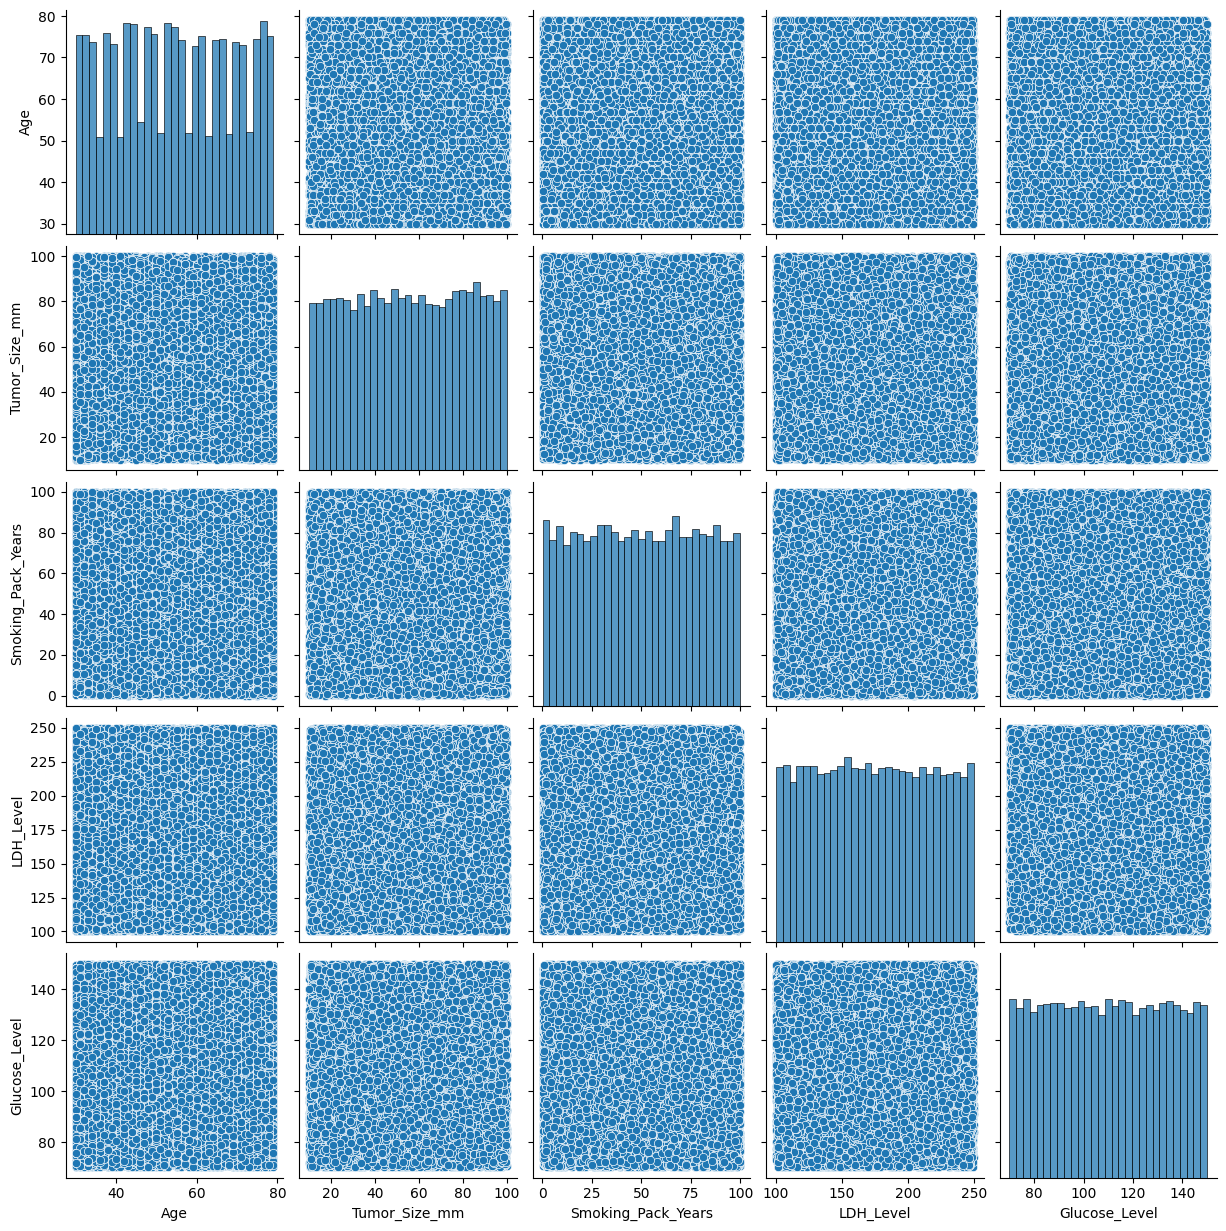

In [8]:
numericas = ['Age', 'Tumor_Size_mm', 'Smoking_Pack_Years', 'LDH_Level', 'Glucose_Level']

df[numericas].describe()

# Pairplot para ver correlaciones visuales
sns.pairplot(df[numericas])
plt.show()


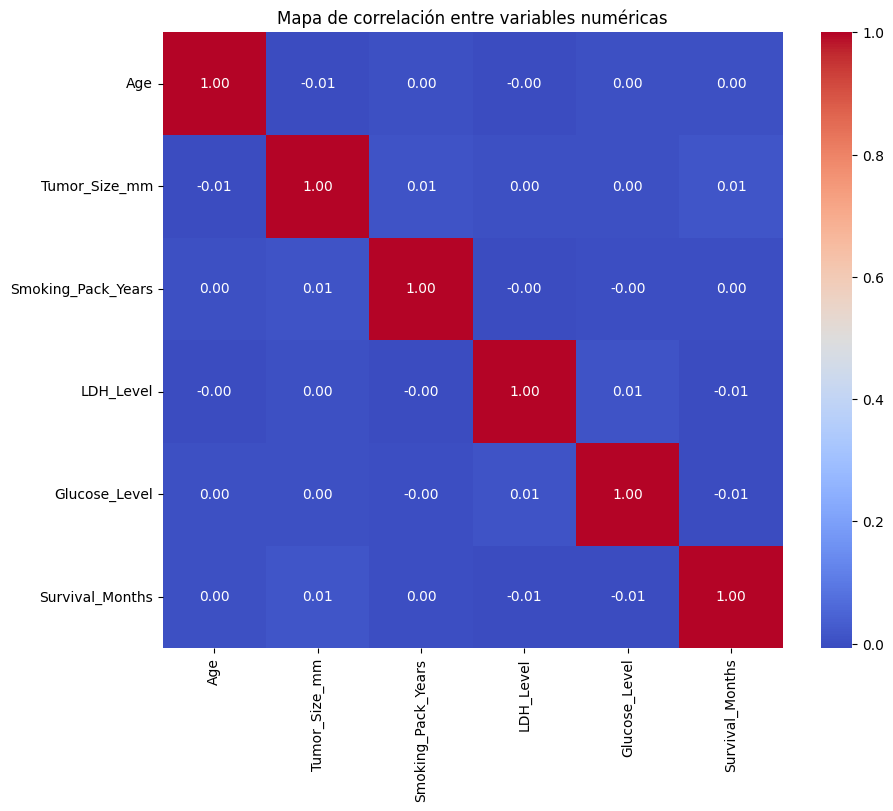

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numericas + ['Survival_Months']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()


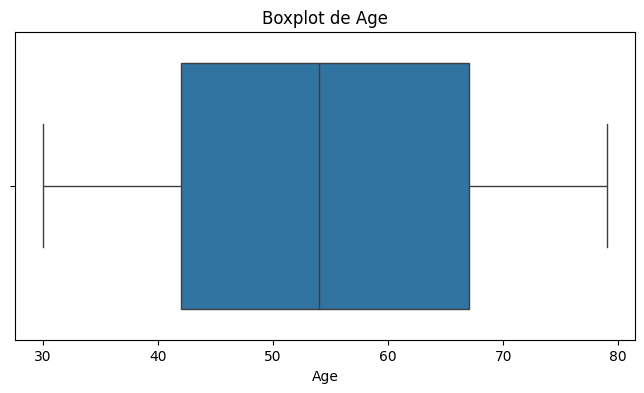

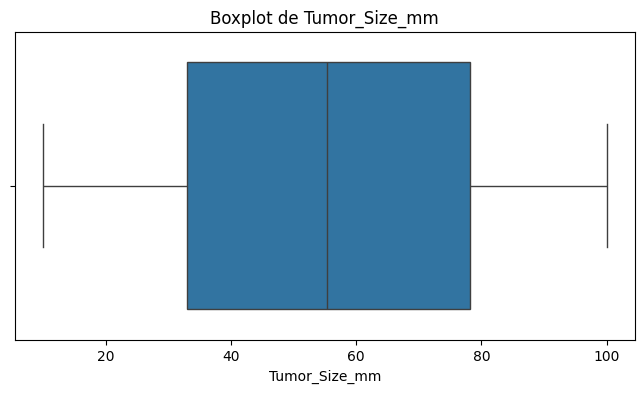

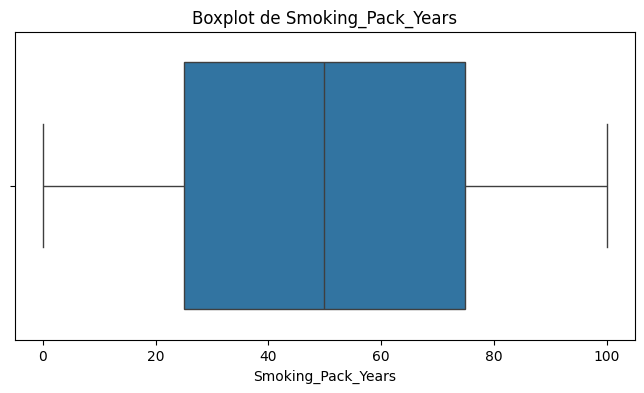

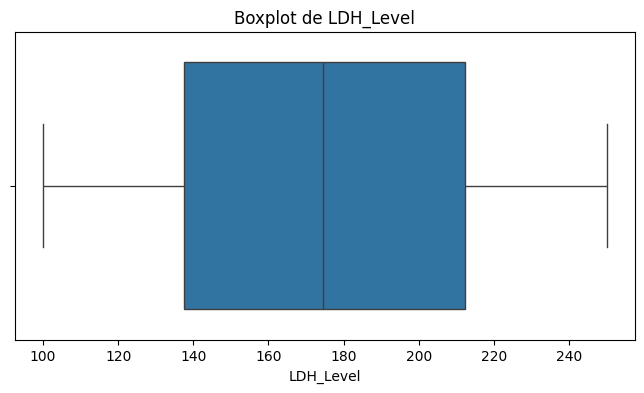

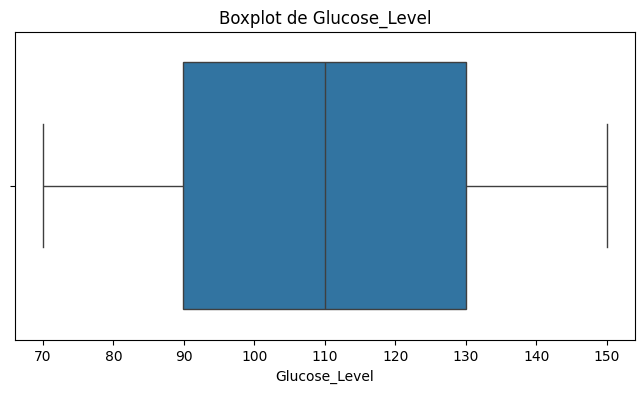

In [10]:
for col in numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de {col}")
    plt.show()


##  3. Preparación de los Datos

En esta fase se preparan los datos para aplicar modelos de Machine Learning, asegurando que todas las variables estén en un formato adecuado y optimizado.

---

###  1. Codificación de variables categóricas

Se utilizaron variables como `Gender`, `Smoking_History`, `Tumor_Location`, `Stage`, `Treatment`, `Ethnicity`, 
que son categóricas. Para poder utilizarlas en modelos, se aplicó **One-Hot Encoding**.

In [78]:
# Copia del dataset original
df_ml = df.copy()

# One-hot encoding de todas las columnas categóricas relevantes
df_ml = pd.get_dummies(df_ml, columns=['Gender', 'Smoking_History', 'Tumor_Location',
                                       'Treatment', 'Ethnicity'], drop_first=True)

In [ ]:
#Eliminamos la columna Patient_ID
df_ml.drop(columns=['Patient_ID'], inplace=True)

In [81]:
from sklearn.preprocessing import StandardScaler

escalar = StandardScaler()
numericas = ['Age', 'Tumor_Size_mm', 'Smoking_Pack_Years', 'LDH_Level', 'Glucose_Level']

df_ml[numericas] = escalar.fit_transform(df_ml[numericas])



In [82]:

# Clasificación binaria: 1 = Alta supervivencia (>60), 0 = Baja (≤60)
df_ml['Survival_Class'] = (df['Survival_Months'] > 60).astype(int)

# También se puede usar para análisis de riesgo
df_ml['High_Risk'] = (df['Survival_Months'] <= 60).astype(int)

In [83]:
# Codificamos variables categóricas de tipo texto con One-Hot Encoding
columnas_a_codificar = [
    'Stage','Insurance_Type', 'Family_History',
    'Comorbidity_Diabetes', 'Comorbidity_Hypertension',
    'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease',
    'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease',
    'Comorbidity_Other'
]

df_ml = pd.get_dummies(df_ml, columns=columnas_a_codificar, drop_first=True)

## Dividir los datos en conjuntos de entrenamiento y prueba
- A. Modelo de Regresión

- B. Clasificación del Estado del Cáncer

- C. Análisis de Riesgo (Binario)

In [85]:
from sklearn.model_selection import train_test_split

X_reg = df_ml.drop(columns=['Survival_Months', 'Survival_Class', 'High_Risk'])
y_reg = df_ml['Survival_Months']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [86]:
X_stage = df_ml.drop(columns=['Survival_Months', 'Survival_Class', 'High_Risk'])
y_stage = df['Stage']  # Se mantiene la original porque aún no fue codificada como numérica

X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(X_stage, y_stage, test_size=0.2, random_state=42)


In [87]:
X_risk = df_ml.drop(columns=['Survival_Months', 'Survival_Class', 'High_Risk'])
y_risk = df_ml['High_Risk']

X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X_risk, y_risk, test_size=0.2, random_state=42)


## Parte A: Regresión – Predicción de Supervivencia

### Objetivo:
Predecir la cantidad de meses que un paciente con cáncer de pulmón puede sobrevivir (`Survival_Months`), utilizando variables clínicas, demográficas, biomarcadores y factores de estilo de vida.

El valor a predecir es una variable continua que representa el tiempo de supervivencia en meses desde el diagnóstico o el tratamiento.

---

### Modelos de regresión utilizados:

- **Regresión Lineal**
- **Random Forest Regressor**
- **XGBoost Regressor**

---

### Métricas de evaluación:

Para evaluar el rendimiento de los modelos de regresión se utilizaron las siguientes métricas:

- **MAE (Mean Absolute Error)**: error promedio absoluto entre predicciones y valores reales.
- **MSE (Mean Squared Error)**: penaliza más los errores grandes al elevarlos al cuadrado.
- **R² (Coeficiente de Determinación)**: indica qué proporción de la varianza de la variable objetivo es explicada por el modelo.


In [89]:
print(df_ml.columns)


Index(['Age', 'Tumor_Size_mm', 'Survival_Months', 'Performance_Status',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Blood_Pressure_Pulse', 'Hemoglobin_Level', 'White_Blood_Cell_Count',
       'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level',
       'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level',
       'Creatinine_Level', 'LDH_Level', 'Calcium_Level', 'Phosphorus_Level',
       'Glucose_Level', 'Potassium_Level', 'Sodium_Level',
       'Smoking_Pack_Years', 'Gender_Male', 'Smoking_History_Former Smoker',
       'Smoking_History_Never Smoked', 'Tumor_Location_Middle Lobe',
       'Tumor_Location_Upper Lobe', 'Treatment_Radiation Therapy',
       'Treatment_Surgery', 'Treatment_Targeted Therapy', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic', 'Ethnicity_Other',
       'Survival_Class', 'High_Risk', 'Stage_Stage II', 'Stage_Stage III',
       'Stage_Stage IV', 'Insurance_Type_Medicare', 'Insurance_Type_

In [91]:
columnas_categoricas = [
    'Age', 'Tumor_Size_mm', 'Survival_Months',
       'Performance_Status', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level',
       'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level',
       'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level',
       'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level',
       'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
       'Sodium_Level', 'Smoking_Pack_Years', 'Gender_Male',
       'Smoking_History_Former Smoker', 'Smoking_History_Never Smoked',
       'Tumor_Location_Middle Lobe', 'Tumor_Location_Upper Lobe',
       'Treatment_Radiation Therapy', 'Treatment_Surgery',
       'Treatment_Targeted Therapy', 'Ethnicity_Asian', 'Ethnicity_Caucasian',
       'Ethnicity_Hispanic', 'Ethnicity_Other', 'Survival_Class', 'High_Risk',
       'Stage_Stage II', 'Stage_Stage III', 'Stage_Stage IV',
       'Insurance_Type_Medicare', 'Insurance_Type_Other',
       'Insurance_Type_Private', 'Family_History_Yes',
       'Comorbidity_Diabetes_Yes', 'Comorbidity_Hypertension_Yes',
       'Comorbidity_Heart_Disease_Yes', 'Comorbidity_Chronic_Lung_Disease_Yes',
       'Comorbidity_Kidney_Disease_Yes', 'Comorbidity_Autoimmune_Disease_Yes',
       'Comorbidity_Other_Yes'
]

for col in columnas_categoricas:
    print(f"\nValores únicos en '{col}':")
    print(df_ml[col].unique())



Valores únicos en 'Age':
[ 0.94196854  0.24733508 -0.72515176  1.21982193 -1.21139519 -0.30837169
 -0.44729838 -0.169445   -1.00300515 -0.09998165  0.7335785   1.01143189
 -1.55871192 -0.23890834 -1.62817526  1.28928527  0.31679843  0.8725052
  0.52518847 -0.9335418  -0.0305183   1.636602    0.10840839  1.15035858
  0.17787173 -0.65568842  1.49767531  0.80304185 -1.28085853 -1.14193184
 -0.51676173 -1.48924857 -0.79461511  1.70606535  0.03894504 -0.37783503
  0.66411516 -0.58622507 -1.35032188  0.59465181 -1.07246849  0.38626177
  1.56713866  1.35874862  1.08089523 -1.69763861 -1.41978522 -0.86407846
  0.45572512  1.42821196]

Valores únicos en 'Tumor_Size_mm':
[ 1.01119592  0.88696773  0.47418324 ...  1.31736825 -0.36969123
 -1.61218042]

Valores únicos en 'Survival_Months':
[ 44 101  69  95 105  49  63  35  19  53  92   2 100  52  20 114 115  59
   3   8  40  30  12 116 103  17  66  23  39  27  57  32  33  43 104  14
  80  98  58  62  47  84 108  46 106  29   9  73  25  81  50  71  

In [92]:
#regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)

print("Regresión Lineal:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_lr))
print("MSE:", mean_squared_error(y_test_reg, y_pred_lr))
print("R²:", r2_score(y_test_reg, y_pred_lr))

Regresión Lineal:
MAE: 29.599690824549718
MSE: 1178.709298664202
R²: -0.0035054484357515125


In [95]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_reg, y_train_reg)
y_pred_rf = rf.predict(X_test_reg)

print("Random Forest:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_rf))
print("MSE:", mean_squared_error(y_test_reg, y_pred_rf))
print("R²:", r2_score(y_test_reg, y_pred_rf))


Random Forest:
MAE: 29.64944420963652
MSE: 1192.3234168005074
R²: -0.015095958276399424


In [94]:
# SBGoot regressor
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_xgb = xgb_reg.predict(X_test_reg)

print("XGBoost:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_xgb))
print("MSE:", mean_squared_error(y_test_reg, y_pred_xgb))
print("R²:", r2_score(y_test_reg, y_pred_xgb))


XGBoost:
MAE: 29.820615768432617
MSE: 1205.289306640625
R²: -0.026134610176086426


## Parte B: Clasificación del Estado del Cáncer

### Objetivo:
Predecir la etapa clínica del cáncer de pulmón (`Stage`) a partir de variables clínicas, demográficas, biomarcadores y comorbilidades.

El modelo debe clasificar a los pacientes en una de las siguientes categorías:
- Stage I
- Stage II
- Stage III
- Stage IV

---

### Modelos de clasificación utilizados:

- **Random Forest Classifier**
- **Support Vector Machine (SVM)**
- **K-Nearest Neighbors (k-NN)**

---

### Métricas de evaluación:

Para evaluar el desempeño de los modelos se utilizaron las siguientes métricas:

- **Accuracy**: proporción total de predicciones correctas.
- **Precision**: proporción de verdaderos positivos entre todos los predichos como positivos (por clase).
- **Recall**: proporción de verdaderos positivos entre todos los casos reales positivos (por clase).
- **F1-score**: medida armónica entre precisión y recall, útil para evaluar el balance entre ambos.

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_stage, y_train_stage)
y_pred_rf = rf_clf.predict(X_test_stage)

#Random Forest

print("Random Forest:")
print(classification_report(y_test_stage, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

     Stage I       1.00      1.00      1.00      1145
    Stage II       1.00      1.00      1.00      1153
   Stage III       1.00      1.00      1.00      1230
    Stage IV       1.00      1.00      1.00      1204

    accuracy                           1.00      4732
   macro avg       1.00      1.00      1.00      4732
weighted avg       1.00      1.00      1.00      4732



In [102]:
#Support Vector Machine
svm_clf = SVC()
svm_clf.fit(X_train_stage, y_train_stage)
y_pred_svm = svm_clf.predict(X_test_stage)

print("SVM:")
print(classification_report(y_test_stage, y_pred_svm))


SVM:
              precision    recall  f1-score   support

     Stage I       0.24      0.23      0.24      1145
    Stage II       0.28      0.19      0.23      1153
   Stage III       0.00      0.00      0.00      1230
    Stage IV       0.27      0.64      0.38      1204

    accuracy                           0.27      4732
   macro avg       0.20      0.27      0.21      4732
weighted avg       0.20      0.27      0.21      4732



c:\Users\HARRISON\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HARRISON\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HARRISON\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [101]:
#K-Nearest Neighbors
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_stage, y_train_stage)
y_pred_knn = knn_clf.predict(X_test_stage)

print("📊 k-NN:")
print(classification_report(y_test_stage, y_pred_knn))



📊 k-NN:
              precision    recall  f1-score   support

     Stage I       0.23      0.34      0.28      1145
    Stage II       0.25      0.26      0.25      1153
   Stage III       0.25      0.21      0.23      1230
    Stage IV       0.28      0.19      0.23      1204

    accuracy                           0.25      4732
   macro avg       0.25      0.25      0.25      4732
weighted avg       0.25      0.25      0.25      4732



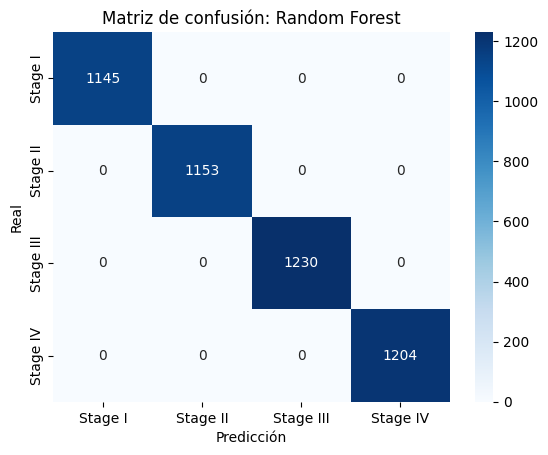

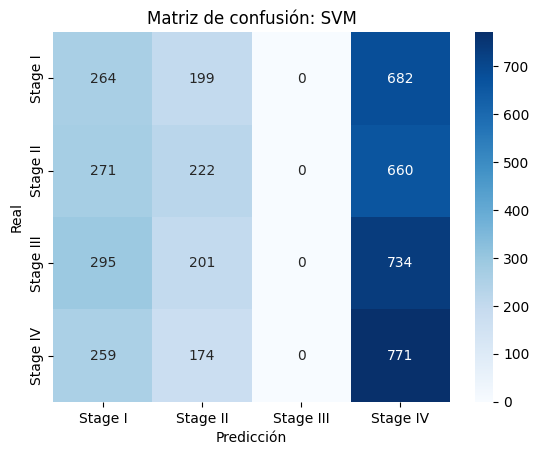

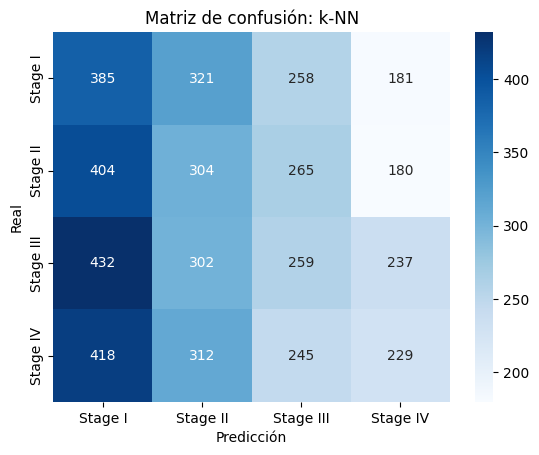

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=sorted(y_stage.unique()))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_stage.unique()), yticklabels=sorted(y_stage.unique()))
    plt.title(f"Matriz de confusión: {title}")
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

plot_confusion(y_test_stage, y_pred_rf, "Random Forest")
plot_confusion(y_test_stage, y_pred_svm, "SVM")
plot_confusion(y_test_stage, y_pred_knn, "k-NN")


## 4. Modelado – Parte C: Análisis de Riesgo (Clasificación Binaria)

### Objetivo:
Predecir si un paciente con cáncer de pulmón es de **alto riesgo** o **bajo riesgo**, según su expectativa de vida.

Se definió como variable binaria `High_Risk`:
- **1 = Alto riesgo** → Supervivencia de 60 meses o menos
- **0 = Bajo riesgo** → Supervivencia mayor a 60 meses

Esta clasificación es útil para priorizar el seguimiento clínico, intervenciones preventivas o cambios en el tratamiento.


---

### Métricas de evaluación:

Debido al carácter binario del problema, se utilizaron métricas orientadas a clasificación desequilibrada:

- **F1-Score**: medida balanceada entre precisión y recall, ideal cuando los datos están desbalanceados.
- **AUC (Área Bajo la Curva ROC)**: mide la capacidad del modelo para distinguir entre clases alto riesgo y bajo riesgo.
- **Accuracy**: también se consideró para evaluación general, aunque puede ser engañosa si hay clases desbalanceadas.

---

### Detalles técnicos:

- La variable objetivo fue `High_Risk` (creada en la fase de preparación de datos a partir de `Survival_Months`).
- Las variables predictoras (`X_risk`) incluyeron características clínicas, comorbilidades y biomarcadores.
- Se aplicaron transformaciones previas como normalización numérica y codificación de variables categóricas.
- El conjunto se dividió en entrenamiento (80%) y prueba (20%) para evaluar los modelos.


 Random Forest  Análisis de Riesgo
Accuracy: 0.51
F1-Score: 0.50
AUC: 0.50
              precision    recall  f1-score   support

           0       0.50      0.53      0.51      2327
           1       0.52      0.48      0.50      2405

    accuracy                           0.51      4732
   macro avg       0.51      0.51      0.51      4732
weighted avg       0.51      0.51      0.51      4732



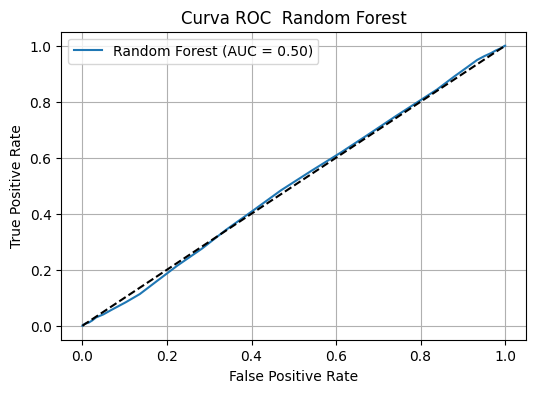

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Entrenamiento
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_risk, y_train_risk)

# Predicciones
y_pred_rf = rf_clf.predict(X_test_risk)
y_proba_rf = rf_clf.predict_proba(X_test_risk)[:, 1]

# Métricas
acc_rf = accuracy_score(y_test_risk, y_pred_rf)
f1_rf = f1_score(y_test_risk, y_pred_rf)
auc_rf = roc_auc_score(y_test_risk, y_proba_rf)

print(" Random Forest  Análisis de Riesgo")
print(f"Accuracy: {acc_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print(f"AUC: {auc_rf:.2f}")
print(classification_report(y_test_risk, y_pred_rf))

# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test_risk, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %.2f)' % auc_rf)
plt.plot([0,1], [0,1], 'k--')
plt.title('Curva ROC  Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()



 SVM  Análisis de Riesgo
Accuracy: 0.50
F1-Score: 0.60
AUC: 0.51
              precision    recall  f1-score   support

           0       0.49      0.26      0.34      2327
           1       0.51      0.74      0.60      2405

    accuracy                           0.50      4732
   macro avg       0.50      0.50      0.47      4732
weighted avg       0.50      0.50      0.47      4732



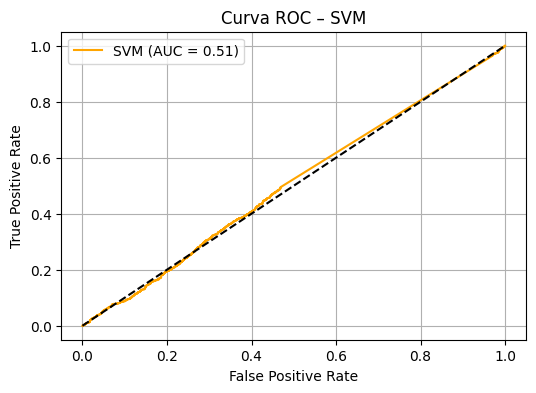

In [106]:
# SVM – Análisis de Riesgo

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Entrenamiento
svm_clf = SVC(probability=True, random_state=42)  # probability=True para ROC
svm_clf.fit(X_train_risk, y_train_risk)

# Predicciones
y_pred_svm = svm_clf.predict(X_test_risk)
y_proba_svm = svm_clf.predict_proba(X_test_risk)[:, 1]

# Métricas
acc_svm = accuracy_score(y_test_risk, y_pred_svm)
f1_svm = f1_score(y_test_risk, y_pred_svm)
auc_svm = roc_auc_score(y_test_risk, y_proba_svm)

print(" SVM  Análisis de Riesgo")
print(f"Accuracy: {acc_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")
print(f"AUC: {auc_svm:.2f}")
print(classification_report(y_test_risk, y_pred_svm))

# Curva ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test_risk, y_proba_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %.2f)' % auc_svm, color='orange')
plt.plot([0,1], [0,1], 'k--')
plt.title('Curva ROC – SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


📊 k-NN – Análisis de Riesgo
Accuracy: 0.48
F1-Score: 0.49
AUC: 0.48
              precision    recall  f1-score   support

           0       0.48      0.49      0.48      2327
           1       0.49      0.48      0.49      2405

    accuracy                           0.48      4732
   macro avg       0.48      0.48      0.48      4732
weighted avg       0.48      0.48      0.48      4732



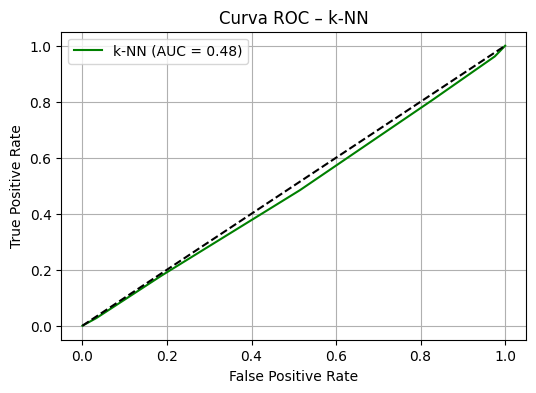

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_risk, y_train_risk)

# Predicciones
y_pred_knn = knn_clf.predict(X_test_risk)
y_proba_knn = knn_clf.predict_proba(X_test_risk)[:, 1]

# Métricas
acc_knn = accuracy_score(y_test_risk, y_pred_knn)
f1_knn = f1_score(y_test_risk, y_pred_knn)
auc_knn = roc_auc_score(y_test_risk, y_proba_knn)

print("k-NN  Análisis de Riesgo")
print(f"Accuracy: {acc_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")
print(f"AUC: {auc_knn:.2f}")
print(classification_report(y_test_risk, y_pred_knn))

# Curva ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test_risk, y_proba_knn)
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label='k-NN (AUC = %.2f)' % auc_knn, color='green')
plt.plot([0,1], [0,1], 'k--')
plt.title('Curva ROC  k-NN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


###  Validación cruzada:

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(random_state=42)

# Evaluar con 5 folds y métrica F1
f1_scores = cross_val_score(rf, X_risk, y_risk, cv=5, scoring='f1')

print("F1-scores por fold:", f1_scores)
print("F1 promedio:", np.mean(f1_scores).round(4))


F1-scores por fold: [0.50084818 0.4869825  0.49537336 0.49039693 0.49344609]
F1 promedio: 0.4934


In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_risk, y_risk)

print("📊 Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

print(f"Mejor F1-score en validación cruzada: {grid_search.best_score_:.4f}")


📊 Mejor combinación de hiperparámetros:
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Mejor F1-score en validación cruzada: 0.5813


# PELIGRO NO EJECUTAR 

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definimos el espacio de hiperparámetros
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)

grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search_svm.fit(X_risk, y_risk)

print("📊 Mejor combinación de hiperparámetros – SVM:")
print(grid_search_svm.best_params_)

print(f"Mejor F1-score (SVM): {grid_search_svm.best_score_:.4f}")


KeyboardInterrupt: 

In [111]:
from sklearn.neighbors import KNeighborsClassifier

# Definimos el espacio de búsqueda para k-NN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search_knn.fit(X_risk, y_risk)

print("📊 Mejor combinación de hiperparámetros – k-NN:")
print(grid_search_knn.best_params_)

print(f"Mejor F1-score (k-NN): {grid_search_knn.best_score_:.4f}")


📊 Mejor combinación de hiperparámetros – k-NN:
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Mejor F1-score (k-NN): 0.5043
